In [13]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime

token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [25]:
import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (24, 18)

# Hand cleansed
Hand cleaned to removed duplicates

In [2]:
cleansed=load_amihud_markets_price()

tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:162: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [3]:
cleansed.count().count()

123

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:43: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:45: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:47: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:47: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:50: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

In [5]:
df=pd.DataFrame()
d_map=sector_map(amihud)
for sect in d_map.keys():
    df[sect]=amihud[d_map[sect]].median(axis=1)

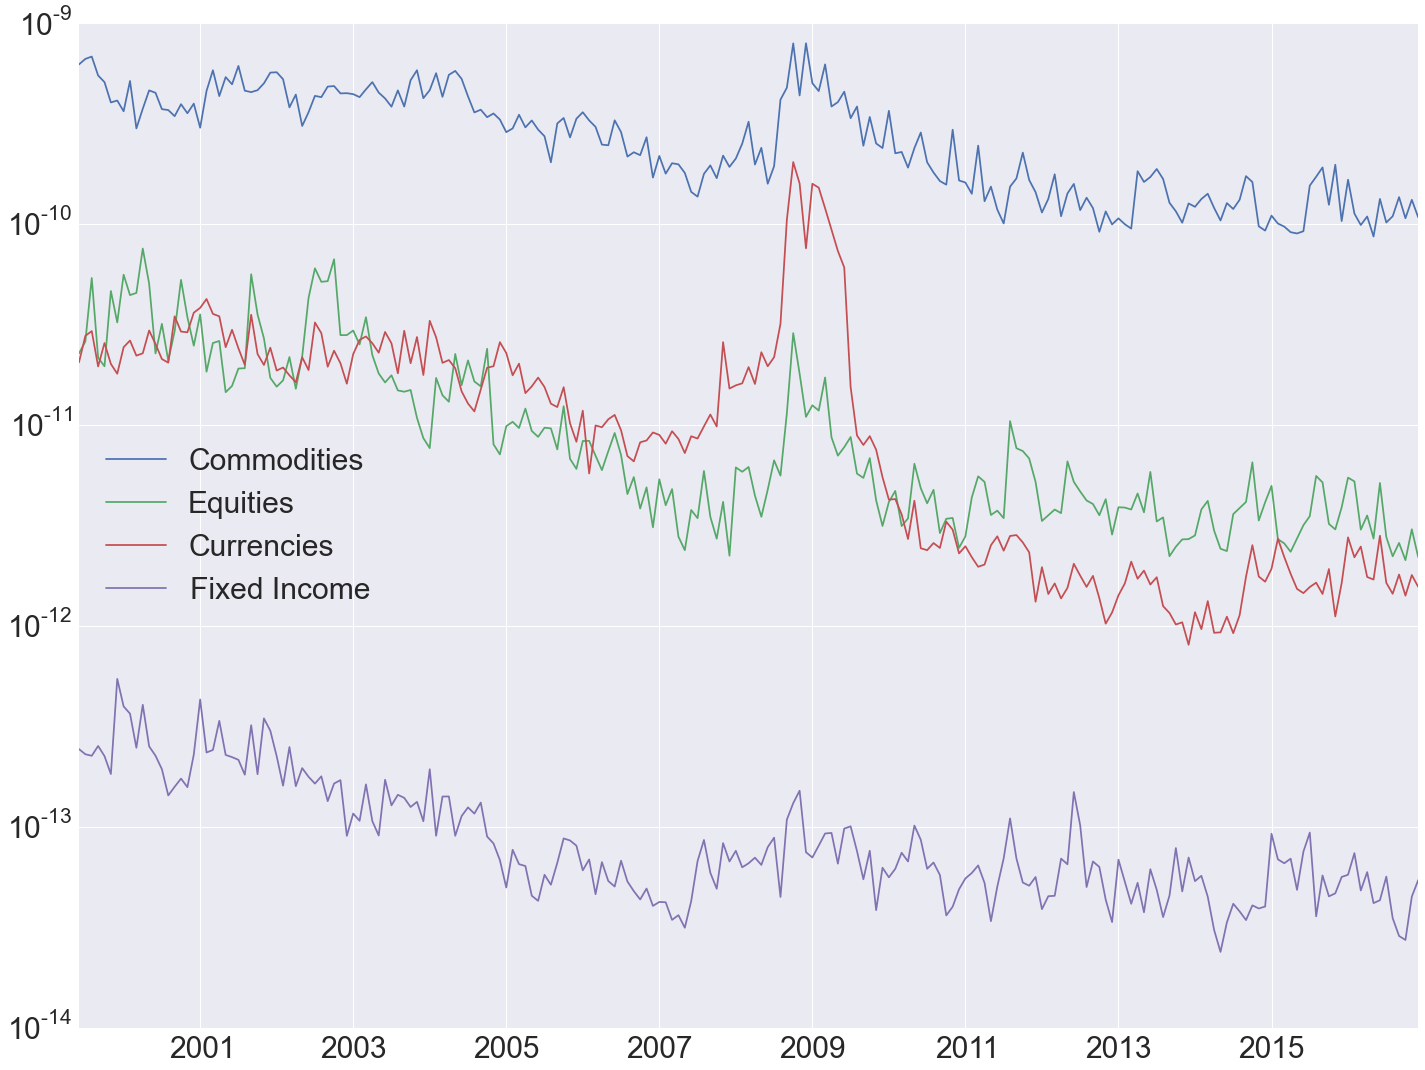

In [15]:
df.dropna().plot(logy=True)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


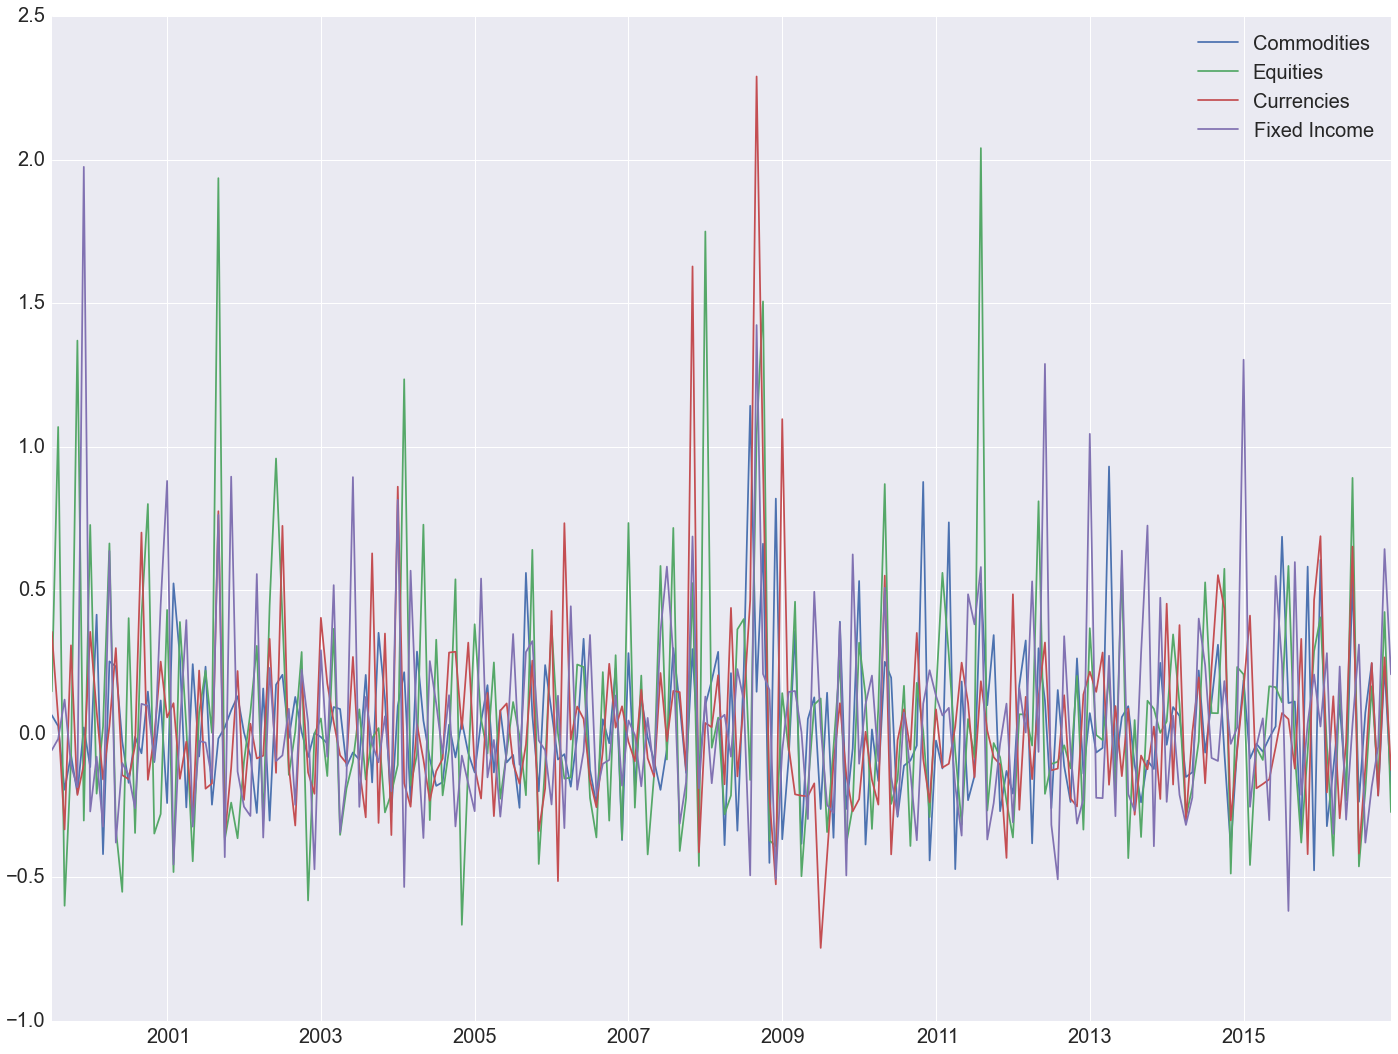

In [34]:
df.resample(rule='m',how='last').pct_change().dropna().plot()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


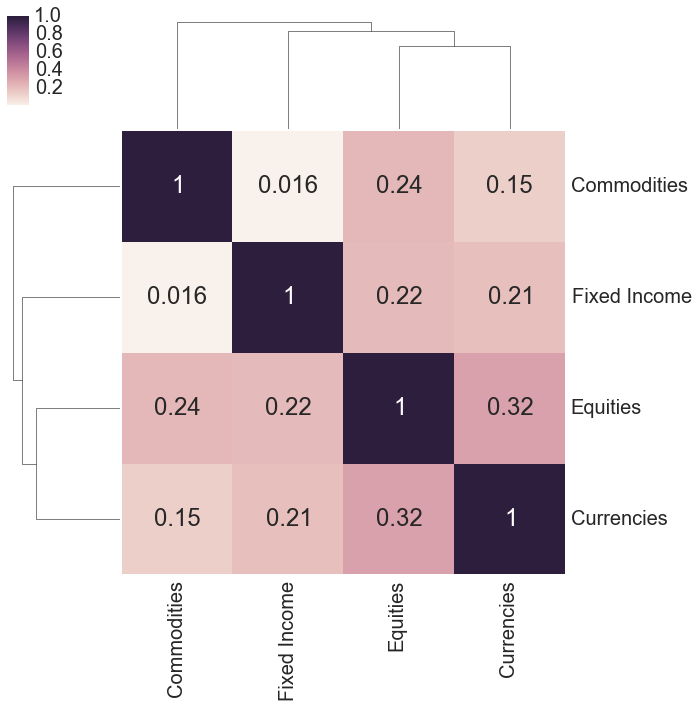

In [31]:
# Monthly resampling correlation
sns.clustermap(df.resample(rule='m',how='last').pct_change().corr(),annot=True)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


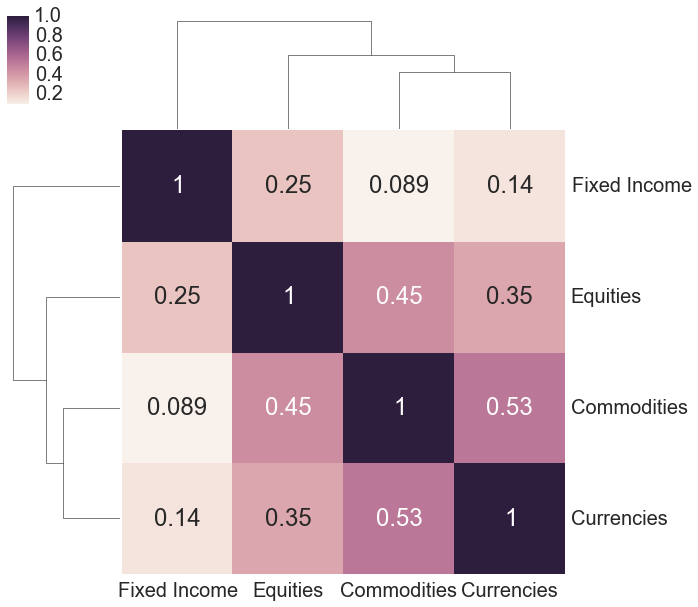

In [32]:
# Quarterly resampling correlation
sns.clustermap(df.resample(rule='q',how='last').pct_change().corr(),annot=True)

In [16]:
mp =load_maps()
s = pd.Series()
for sect in mp.Sector.unique():
    s[sect]= mp[mp.Sector==sect].Sector.count()

In [17]:
res=pd.DataFrame()
res['Mean']=df.mean()*1e13
res['Standard Deviation']=df.std()*1e13
res['Skew']=df.skew()
res['Kurtosis']=df.kurt()
res['Number of Markets']=s

In [18]:
print res.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         Mean &  Standard Deviation &  Skew &  Kurtosis &  Number of Markets \\
\midrule
Commodities  &  2892.796273 &         1606.473446 &   0.0 &       0.0 &                 76 \\
Equities     &   124.833453 &          138.943591 &   0.0 &       0.0 &                 29 \\
Currencies   &   172.022897 &          271.236341 &   0.0 &       0.0 &                  8 \\
Fixed Income &     1.032817 &            0.836522 &   0.0 &       0.0 &                 32 \\
\bottomrule
\end{tabular}



In [11]:
res.to_csv('amihud.csv')

In [12]:
df.dropna().to_csv('amihud_ts.csv')